### Analysis the New Moon Moments
* In the context of Chinese calendar, conjunction syzygy (i.e. new moon) means "合朔", which can be defined as: the apparent longitudes of Sun and Moon are equal.

In [1]:
import common
from datetime import datetime, timedelta

# Generate the data for every day starting from 2000-01-01.
FIRST_DATE = datetime(2020, 1, 1)
datetimes = [FIRST_DATE + timedelta(hours=i) for i in range(0, 365 * 20 * 24)]

# Compute the sun longitude for each date. 
# Simply assume `fraction` is 0.0 (which means we are calculating the longitude of the moment 00:00:00 of the date).
jdes = [common.ut1_to_jde(dt.year, dt.month, dt.day, dt.hour / 24) for dt in datetimes]

sun_coords = [common.sun_apparent_geocentric_coord(jde) for jde in jdes]
sun_longitudes = [sun_coord.lon for sun_coord in sun_coords]

moon_coords = [common.moon_apparent_geocentric_coord(jde) for jde in jdes]
moon_longitudes = [coord.lon for coord in moon_coords]

In [2]:
# Put the data into a dataframe.
assert len(datetimes) == len(sun_longitudes)

import pandas as pd
sun_df = pd.DataFrame({
  'datetime': datetimes,
  'sun_longitude': sun_longitudes
})

sun_df['datetime'] = pd.to_datetime(sun_df['datetime'])

sun_df

,datetime,sun_longitude
0,2020-01-01 00:00:00,280.009519
1,2020-01-01 01:00:00,280.051997
2,2020-01-01 02:00:00,280.094474
3,2020-01-01 03:00:00,280.136951
4,2020-01-01 04:00:00,280.179428
...,...,...
175195,2039-12-26 19:00:00,274.851635
175196,2039-12-26 20:00:00,274.894076
175197,2039-12-26 21:00:00,274.936518
175198,2039-12-26 22:00:00,274.978959


In [3]:
max_sun_longitude = sun_df['sun_longitude'].max()
min_sun_longitude = sun_df['sun_longitude'].min()

# Display the results
print(f"Maximum sun longitude: {max_sun_longitude}")
print(f"Minimum sun longitude: {min_sun_longitude}")

Maximum sun longitude: 359.9989866628214
Minimum sun longitude: 0.005473671083308244


In [4]:
# Put the data into a dataframe.
assert len(datetimes) == len(moon_longitudes)

import pandas as pd
moon_df = pd.DataFrame({
  'datetime': datetimes,
  'moon_longitude': moon_longitudes
})

moon_df['datetime'] = pd.to_datetime(moon_df['datetime'])

moon_df

,datetime,moon_longitude
0,2020-01-01 00:00:00,346.139019
1,2020-01-01 01:00:00,346.635232
2,2020-01-01 02:00:00,347.131305
3,2020-01-01 03:00:00,347.627242
4,2020-01-01 04:00:00,348.123049
...,...,...
175195,2039-12-26 19:00:00,54.503316
175196,2039-12-26 20:00:00,54.999838
175197,2039-12-26 21:00:00,55.496168
175198,2039-12-26 22:00:00,55.992310


In [5]:
# Calculate the maximum and minimum values of moon_longitude
max_moon_longitude = moon_df['moon_longitude'].max()
min_moon_longitude = moon_df['moon_longitude'].min()

# Display the results
print(f"Maximum moon longitude: {max_moon_longitude}")
print(f"Minimum moon longitude: {min_moon_longitude}")

Maximum moon longitude: 359.9991454586362
Minimum moon longitude: 0.0015756941064983677


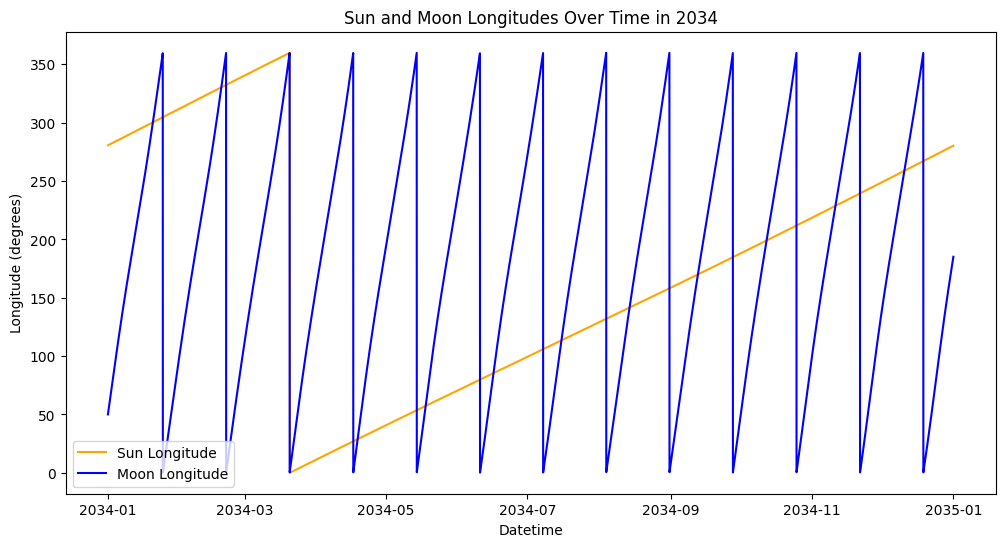

In [6]:
import matplotlib.pyplot as plt

# Filter for the year 2034
sun_df_2034 = sun_df[sun_df['datetime'].dt.year == 2034]
moon_df_2034 = moon_df[moon_df['datetime'].dt.year == 2034]

plt.figure(figsize=(12, 6))

plt.plot(sun_df_2034['datetime'], sun_df_2034['sun_longitude'], label='Sun Longitude', color='orange')
plt.plot(moon_df_2034['datetime'], moon_df_2034['moon_longitude'], label='Moon Longitude', color='blue')

# Adding labels and title
plt.xlabel('Datetime')
plt.ylabel('Longitude (degrees)')
plt.title('Sun and Moon Longitudes Over Time in 2034')
plt.legend()

# Display the plot
plt.show()

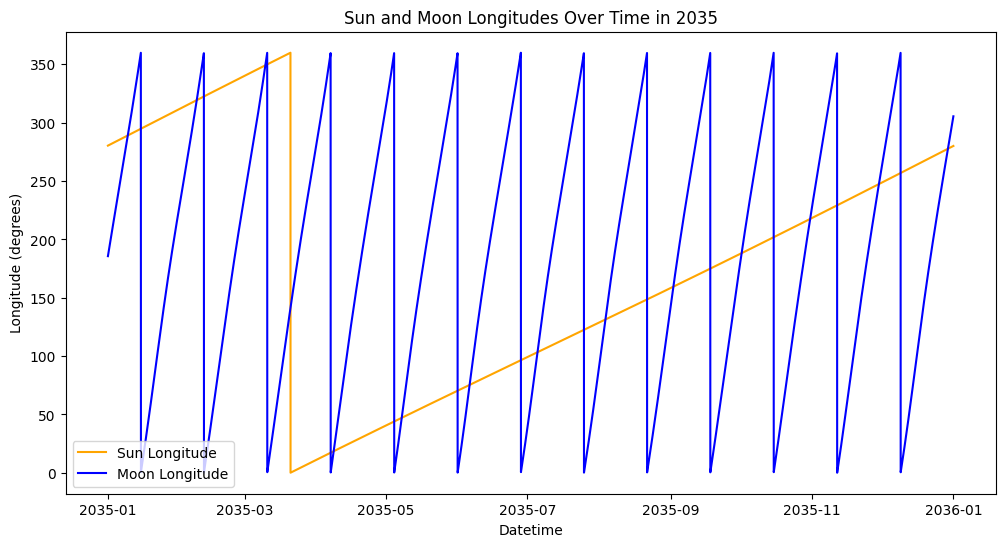

In [7]:
import matplotlib.pyplot as plt

# Filter for the year 2035
sun_df_2035 = sun_df[sun_df['datetime'].dt.year == 2035]
moon_df_2035 = moon_df[moon_df['datetime'].dt.year == 2035]

plt.figure(figsize=(12, 6))

plt.plot(sun_df_2035['datetime'], sun_df_2035['sun_longitude'], label='Sun Longitude', color='orange')
plt.plot(moon_df_2035['datetime'], moon_df_2035['moon_longitude'], label='Moon Longitude', color='blue')

# Adding labels and title
plt.xlabel('Datetime')
plt.ylabel('Longitude (degrees)')
plt.title('Sun and Moon Longitudes Over Time in 2035')
plt.legend()

# Display the plot
plt.show()

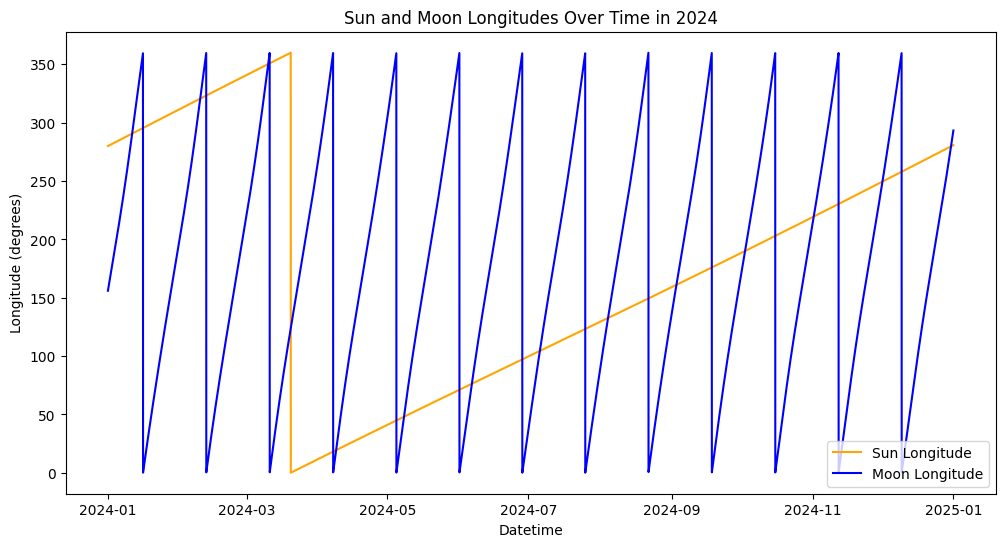

In [8]:
import matplotlib.pyplot as plt

# Filter for the year 2024
sun_df_2024 = sun_df[sun_df['datetime'].dt.year == 2024]
moon_df_2024 = moon_df[moon_df['datetime'].dt.year == 2024]

# Plotting for the year 2024
plt.figure(figsize=(12, 6))

# Plot sun longitudes for 2024
plt.plot(sun_df_2024['datetime'], sun_df_2024['sun_longitude'], label='Sun Longitude', color='orange')

# Plot moon longitudes for 2024
plt.plot(moon_df_2024['datetime'], moon_df_2024['moon_longitude'], label='Moon Longitude', color='blue')

# Adding labels and title
plt.xlabel('Datetime')
plt.ylabel('Longitude (degrees)')
plt.title('Sun and Moon Longitudes Over Time in 2024')
plt.legend()

# Display the plot
plt.show()

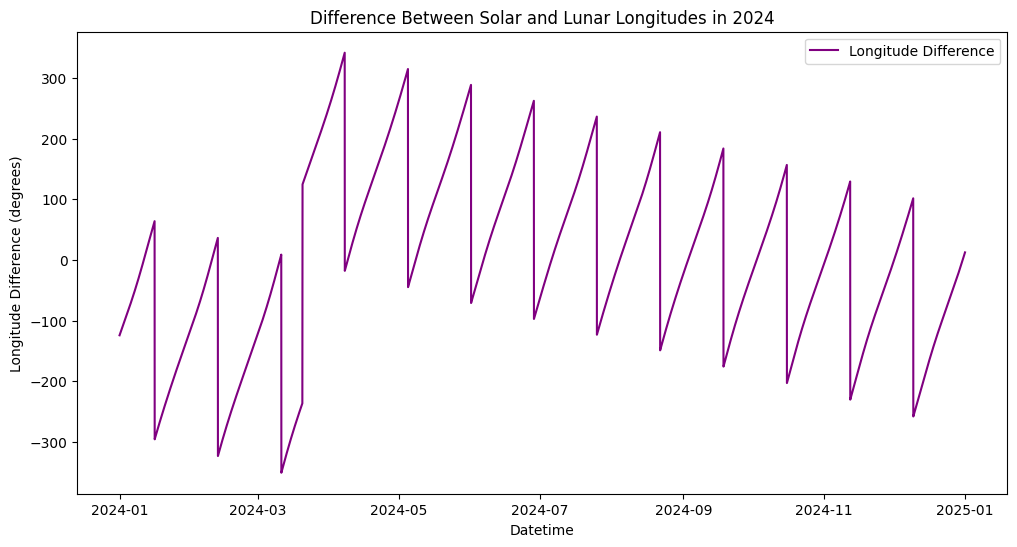

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Merge the two DataFrames on the datetime column
merged_df_2024 = pd.merge(sun_df_2024, moon_df_2024, on='datetime', suffixes=('_sun', '_moon'))

# Calculate the difference between sun and moon longitudes
merged_df_2024['longitude_difference'] = merged_df_2024['moon_longitude'] - merged_df_2024['sun_longitude']

# Plotting the difference
plt.figure(figsize=(12, 6))
plt.plot(merged_df_2024['datetime'], merged_df_2024['longitude_difference'], label='Longitude Difference', color='purple')

# Adding labels and title
plt.xlabel('Datetime')
plt.ylabel('Longitude Difference (degrees)')
plt.title('Difference Between Solar and Lunar Longitudes in 2024')
plt.legend()

# Display the plot
plt.show()

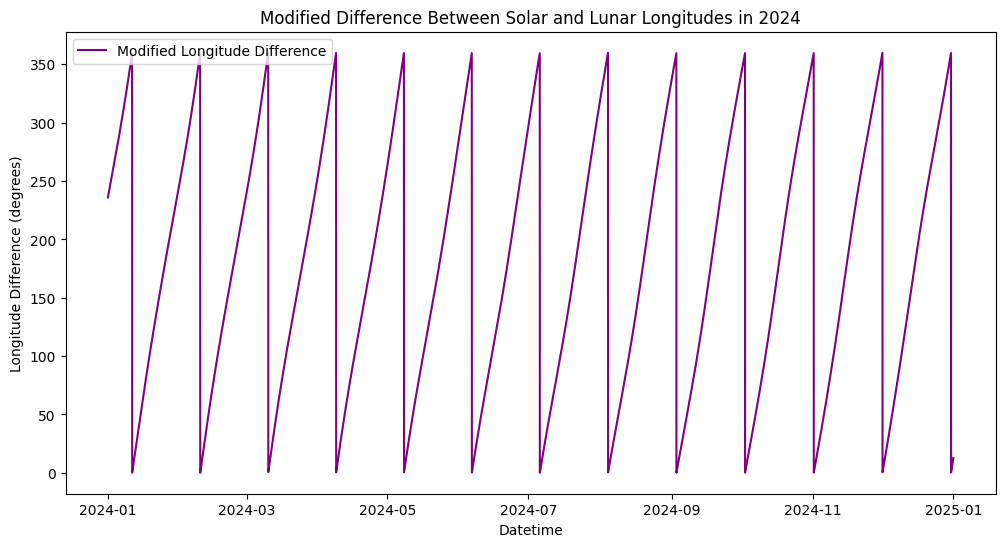

In [10]:
# Calculate the difference between sun and moon longitudes
merged_df_2024['longitude_difference'] = merged_df_2024['moon_longitude'] - merged_df_2024['sun_longitude']

# Define the function
def modify_diff(diff):
  diff = diff % 360.0
  return diff

# Apply the function to the longitude difference
merged_df_2024['modified_longitude_difference'] = merged_df_2024['longitude_difference'].apply(modify_diff)

# Plotting the modified difference
plt.figure(figsize=(12, 6))
plt.plot(merged_df_2024['datetime'], merged_df_2024['modified_longitude_difference'], label='Modified Longitude Difference', color='purple')

# Adding labels and title
plt.xlabel('Datetime')
plt.ylabel('Longitude Difference (degrees)')
plt.title('Modified Difference Between Solar and Lunar Longitudes in 2024')
plt.legend()

# Display the plot
plt.show()

In [11]:
def lon_diff(jde):
  moon_lon = common.moon_apparent_geocentric_coord(jde).lon
  sun_lon = common.sun_apparent_geocentric_coord(jde).lon
  return (moon_lon - sun_lon) % 360.0


def newton_method(left_jde, right_jde) -> float:
  left_diff = lon_diff(left_jde)
  right_diff = lon_diff(right_jde)

  assert left_diff > 345.0
  assert right_diff < 15.0

  def f(jde) -> float:
    diff = lon_diff(jde)
    if diff > 345.0:
      return diff - 360.0
    else:
      return diff
    
  guess = (left_jde + right_jde) / 2.0
  for _ in range(100):
    h = 0.0000001
    prime = (f(guess + h) - f(guess - h)) / (2 * h)
    next_guess = guess - f(guess) / prime

    # Pull back if next guess is out of bounds
    if next_guess < left_jde:
      next_guess = left_jde
    elif next_guess >= right_jde:
      next_guess = right_jde - 1e-20

    if abs(next_guess - guess) < 0.0000000001:
      return next_guess

    guess = next_guess


def first_conjunction_after(jde) -> tuple[float, float]:
  cur_diff = lon_diff(jde)
  gap = 360.0 - cur_diff

  degree_per_day = 360.0 / 29.530588853
  est_jde = jde + gap / degree_per_day

  est_jde_diff = lon_diff(est_jde)
  if est_jde_diff == 0.0: # Very unlikely
    return (est_jde - 0.1, est_jde + 0.1)
  elif est_jde_diff < 30.0:
    return (est_jde - (est_jde_diff * 2 / degree_per_day), est_jde)
  else:
    assert est_jde_diff > 330.0
    return (est_jde, est_jde + ((360.0 - est_jde_diff) * 2 / degree_per_day))

In [12]:
next_pred = first_conjunction_after(common.ut1_to_jde(2024, 1, 1, 0.0))
print(next_pred)
print(f'{lon_diff(next_pred[0])} {lon_diff(next_pred[1])}')

root = newton_method(next_pred[0], next_pred[1])
print(f'Root: {root}, {lon_diff(root)}')


next_pred = first_conjunction_after(common.ut1_to_jde(2024, 3, 1, 0.0))
print(next_pred)
print(f'{lon_diff(next_pred[0])} {lon_diff(next_pred[1])}')

root = newton_method(next_pred[0], next_pred[1])
print(f'Root: {root}, {lon_diff(root)}')


next_pred = first_conjunction_after(common.ut1_to_jde(2024, 12, 31, 0.0))
print(next_pred)
print(f'{lon_diff(next_pred[0])} {lon_diff(next_pred[1])}')

root = newton_method(next_pred[0], next_pred[1])
print(f'Root: {root}, {lon_diff(root)}')

(2460320.6762516527, 2460321.397717917)
355.60239288932405 5.465797957172185
Root: 2460320.9990333035, 359.99999999779163
(2460379.205702176, 2460380.377699453)
350.44101360226693 7.143762386005847
Root: 2460379.8760842243, 2.4910491447371896e-09
(2460704.966682995, 2460705.0920383316)
359.2359122731832 0.857422626307482
Root: 2460705.0257913135, 359.99999999944066


In [13]:
def next_root(jde) -> float:
  jde_lon_diff = lon_diff(jde)
  assert jde_lon_diff > 359.0 or jde_lon_diff < 1.0

  jde += 1.0
  assert lon_diff(jde) < 20.0

  next_root_range = first_conjunction_after(jde)
  root = newton_method(next_root_range[0], next_root_range[1])

  return root


# Find 100 roots since 2024-01-01 00:00:00.0
first_root = newton_method(*first_conjunction_after(common.ut1_to_jde(2024, 1, 1, 0.0)))

roots = [first_root]

while len(roots) < 31:
  root = next_root(roots[-1])
  roots.append(root)

print(roots)

[2460320.9990333035, 2460350.4585794513, 2460379.8760842243, 2460409.2653313978, 2460438.641093933, 2460468.0269966265, 2460497.457322279, 2460526.968203095, 2460556.580986239, 2460586.2849843567, 2460616.0335931526, 2460645.765686331, 2460675.436055392, 2460705.0257913135, 2460734.5320223025, 2460763.9577773716, 2460793.3141790074, 2460822.6274371836, 2460851.939422456, 2460881.300195903, 2460910.7552326834, 2460940.3299979735, 2460970.018333832, 2460999.783617108, 2461029.5724734594, 2461059.328523235, 2461089.001646789, 2461118.5589216044, 2461147.9952596375, 2461177.334959677, 2461206.6218149336]


In [14]:
root_lon_diffs = [lon_diff(root) for root in roots]

for diff in root_lon_diffs:
  assert diff > 359.0 or diff < 1.0

In [15]:
from itertools import pairwise
from operator import sub

root_gaps = [abs(sub(*pair)) for pair in pairwise(roots)]
root_gaps

[29.459546147845685,
 29.41750477300957,
 29.389247173443437,
 29.375762535259128,
 29.385902693495154,
 29.430325652472675,
 29.510880815796554,
 29.61278314422816,
 29.70399811770767,
 29.748608795925975,
 29.732093178201467,
 29.670369061175734,
 29.58973592147231,
 29.506230989005417,
 29.425755069125444,
 29.356401635799557,
 29.313258176203817,
 29.31198527244851,
 29.360773446969688,
 29.455036780331284,
 29.574765290133655,
 29.688335858285427,
 29.765283276326954,
 29.788856351282448,
 29.756049775518477,
 29.673123553860933,
 29.557274815626442,
 29.436338033061475,
 29.339700039476156,
 29.286855256650597]

In [16]:
first_jde_2024 = common.ut1_to_jde(2024, 1, 1, 0.0)

jdes = [first_jde_2024 + n * 0.1 for n in range(365 * 25)]
lon_diffs = [lon_diff(jde) for jde in jdes]

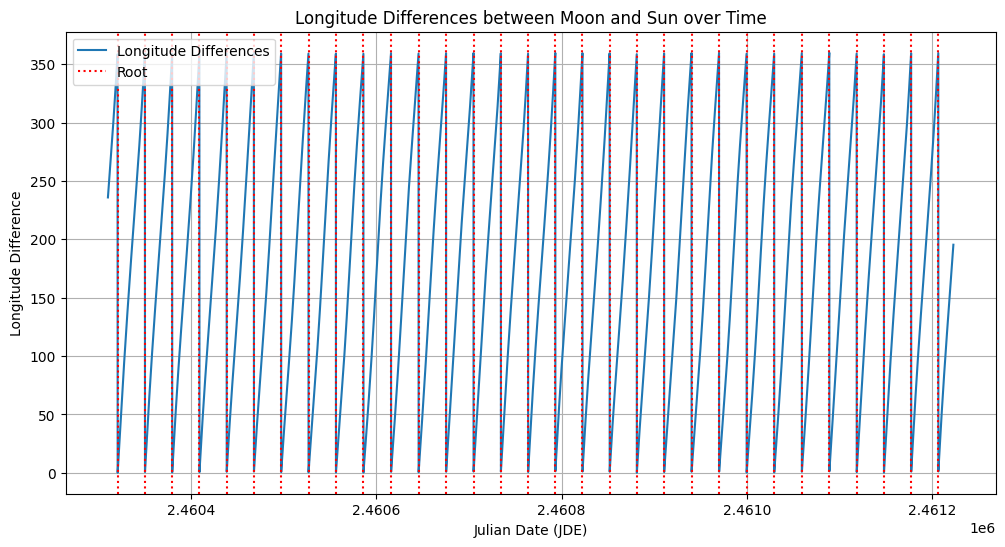

In [17]:
# Plotting the results
plt.figure(figsize=(12, 6))
plt.plot(jdes, lon_diffs, label="Longitude Differences")

# Marking the roots on the plot
for root in roots:
  plt.axvline(x=root, color='r', linestyle=':', label='Root' if root == roots[0] else "")

plt.xlabel('Julian Date (JDE)')
plt.ylabel('Longitude Difference')
plt.title('Longitude Differences between Moon and Sun over Time')
plt.legend()
plt.grid(True)
plt.show()

In [18]:
def find_roots(year) -> list[float]:
  roots = []

  first_range = first_conjunction_after(common.ut1_to_jde(year, 1, 1, 0.0))
  first_root = newton_method(first_range[0], first_range[1])

  roots.append(first_root)

  while True:
    root = next_root(roots[-1])
    
    dt = common.jde_to_ut1(root)
    if dt.year != year:
      break

    roots.append(root)

  return roots


from itertools import count

def plot_year(year):
  roots = find_roots(year)

  jdes = []
  year_start_jde = common.ut1_to_jde(year, 1, 1, 0.0)
  year_end_jde = common.ut1_to_jde(year + 1, 1, 1, 0.0)

  for n in count(0):
    jde = year_start_jde + n * 0.1
    if jde >= year_end_jde:
      break
    jdes.append(jde)

  lon_diffs = [lon_diff(jde) for jde in jdes]

  # Plotting the results
  plt.figure(figsize=(12, 6))
  plt.plot(jdes, lon_diffs, label="Longitude Differences")

  # Marking the roots on the plot
  for root in roots:
    plt.axvline(x=root, color='r', linestyle=':', label='Root' if root == roots[0] else "")

  plt.xlabel('Julian Date (JDE)')
  plt.ylabel('Longitude Difference')
  plt.title(f'Longitude Differences between Moon and Sun in {year}')
  plt.legend()
  plt.grid(True)
  plt.show()

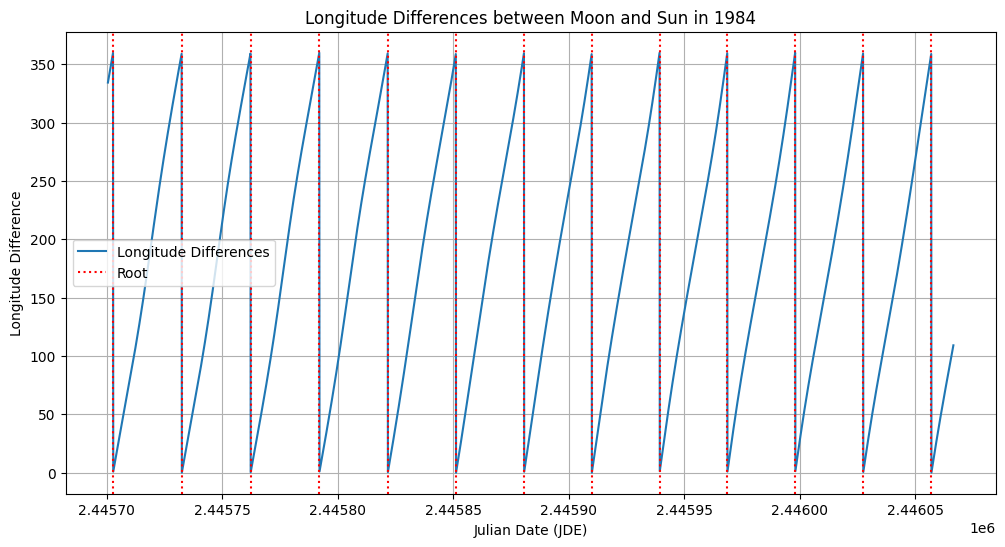

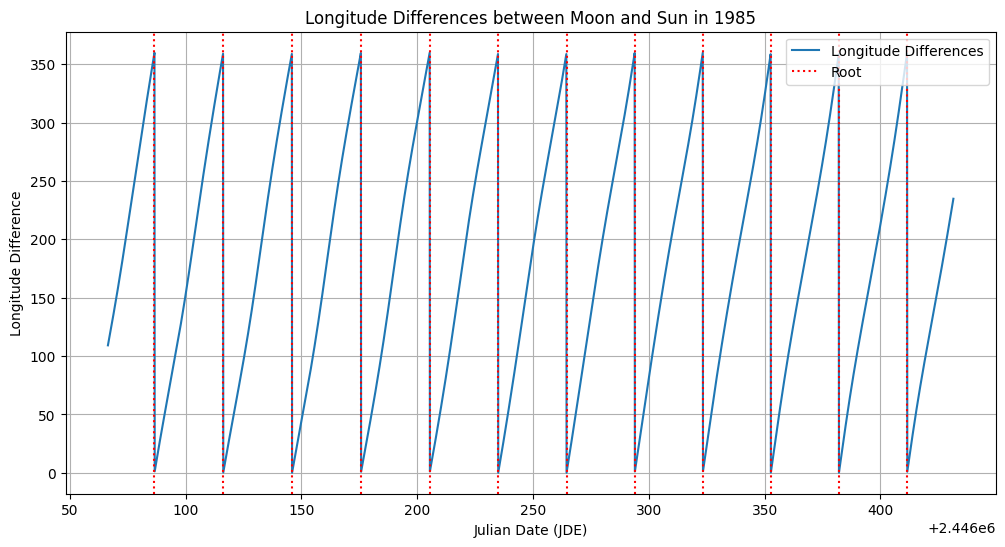

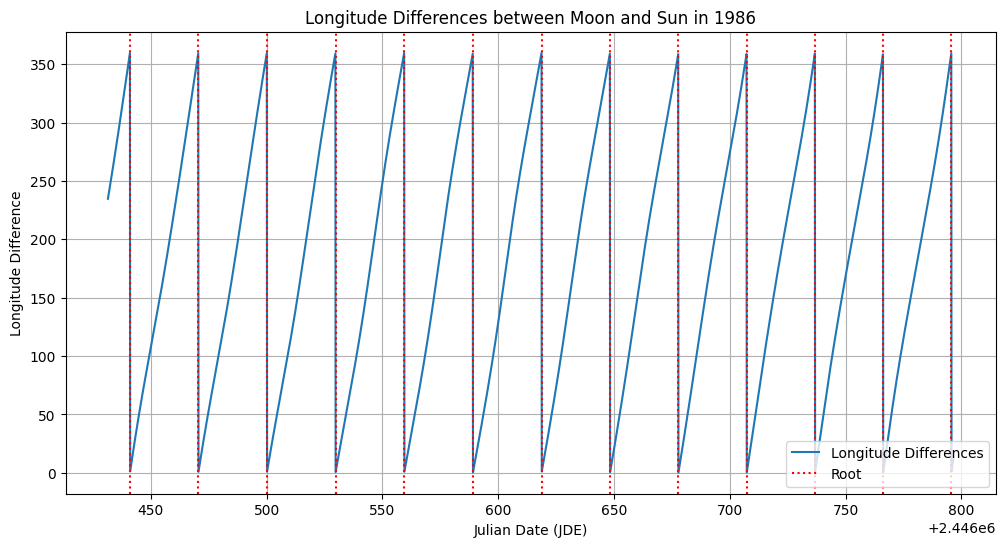

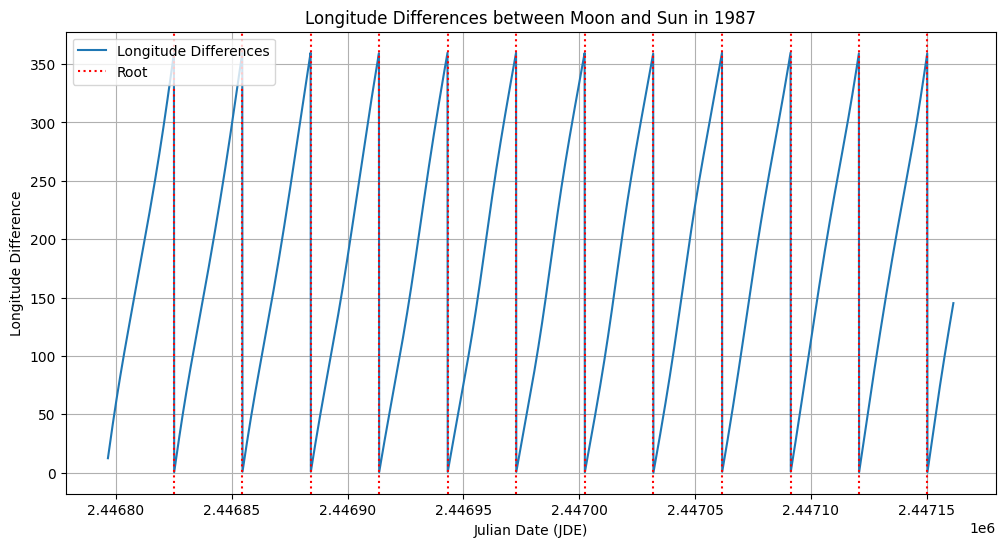

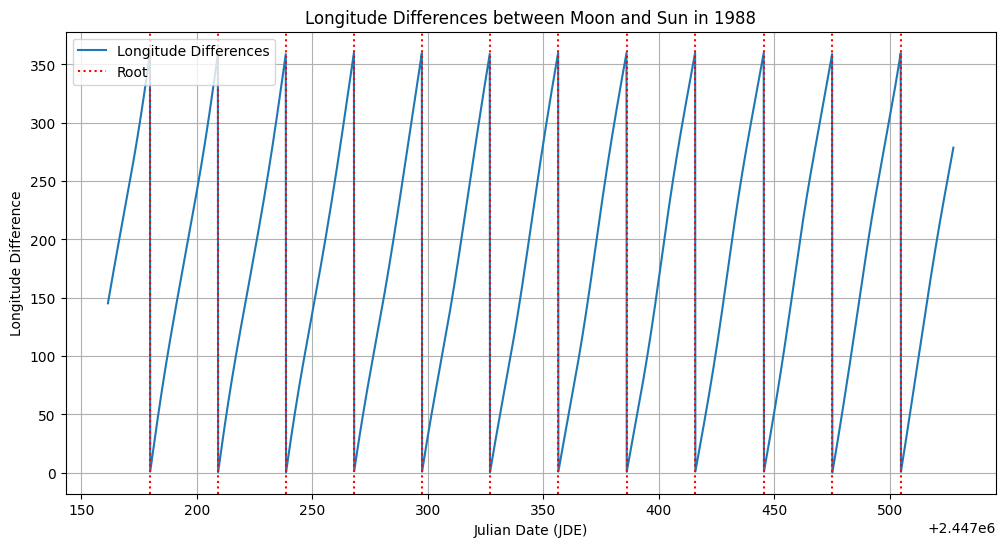

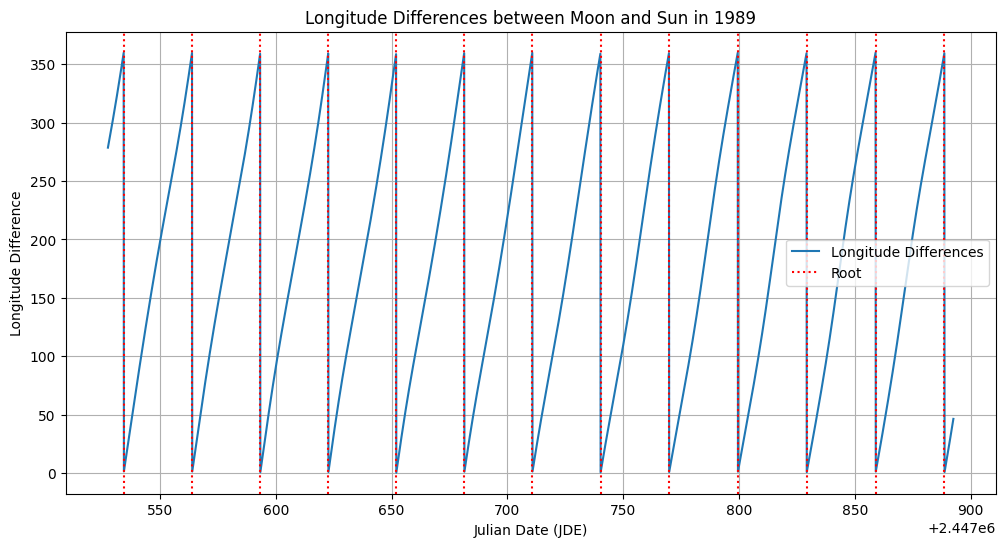

In [19]:
plot_year(1984)
plot_year(1985)
plot_year(1986)
plot_year(1987)
plot_year(1988)
plot_year(1989)

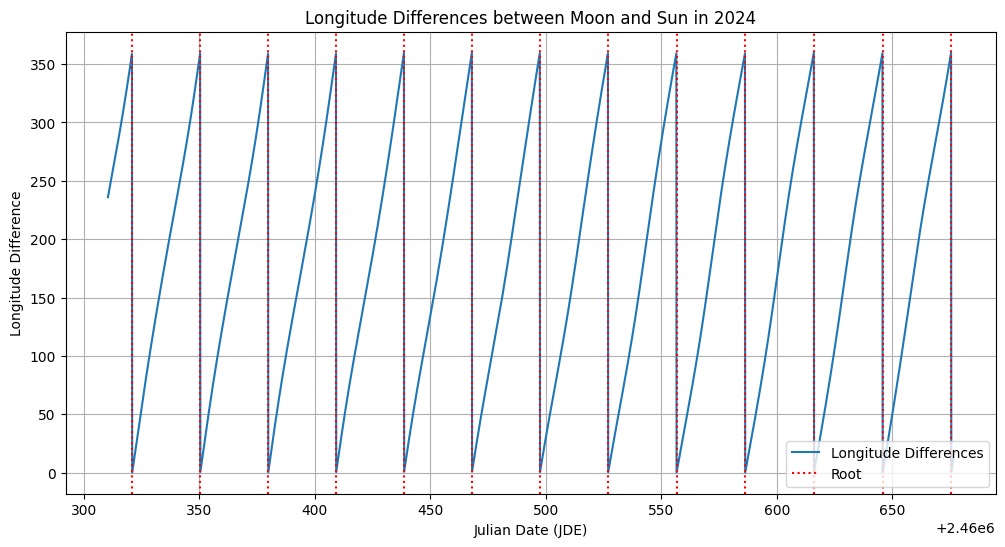

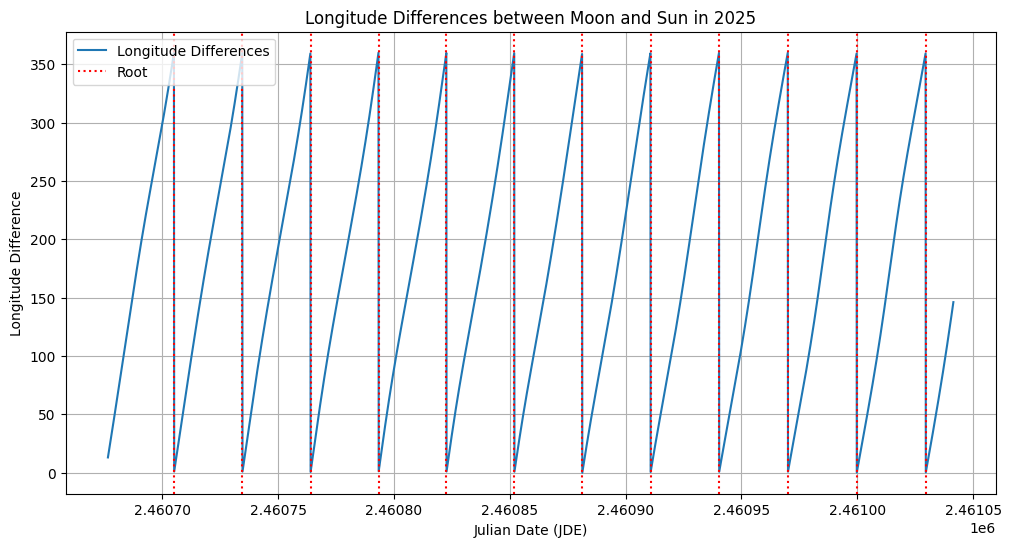

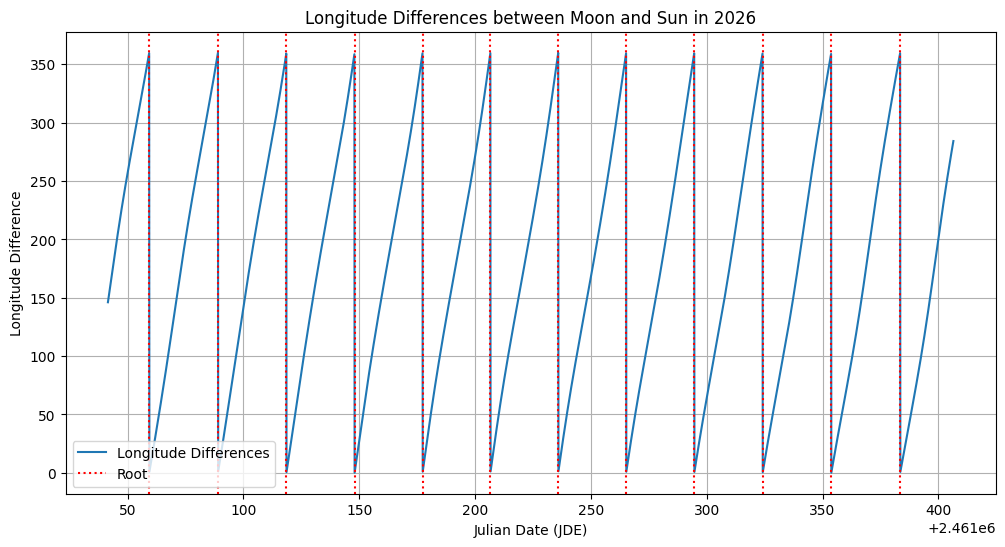

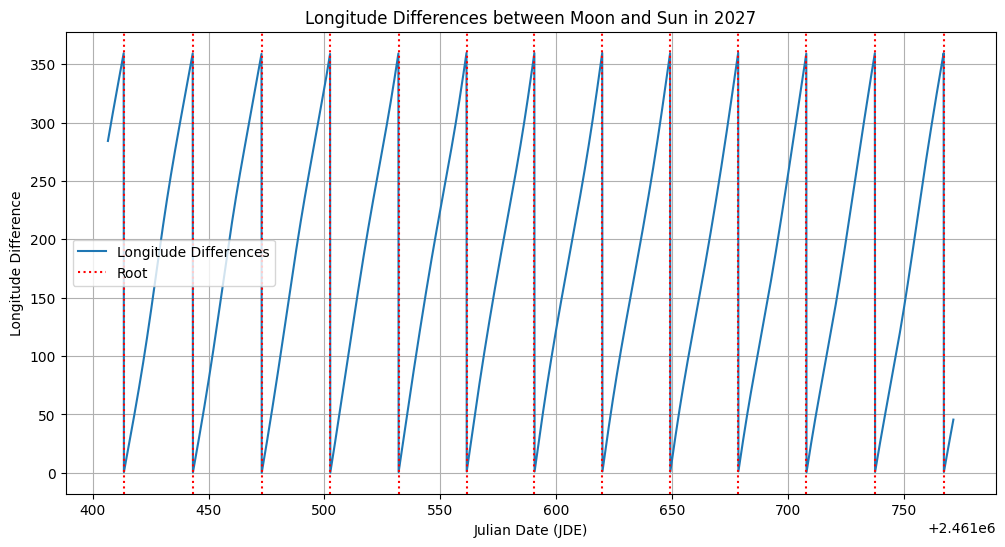

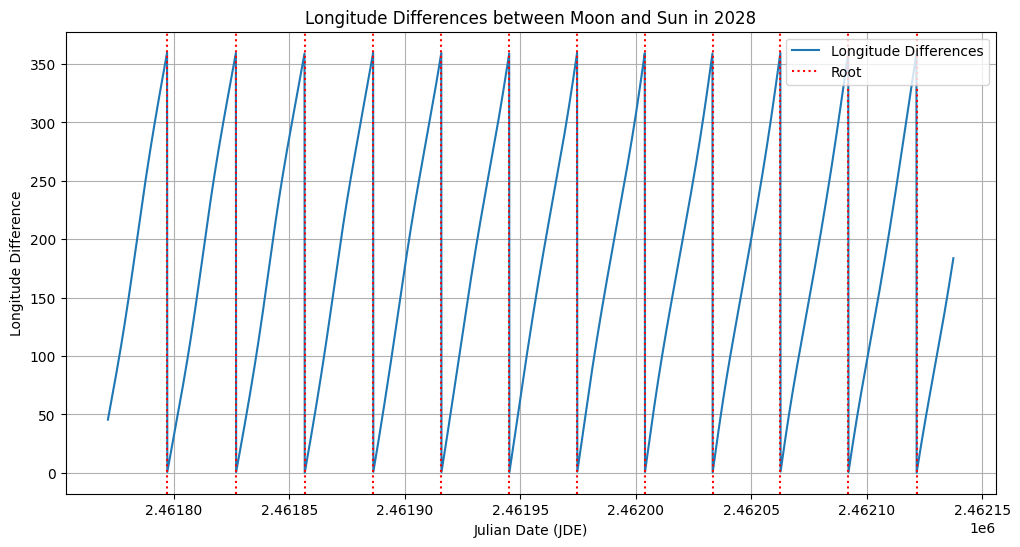

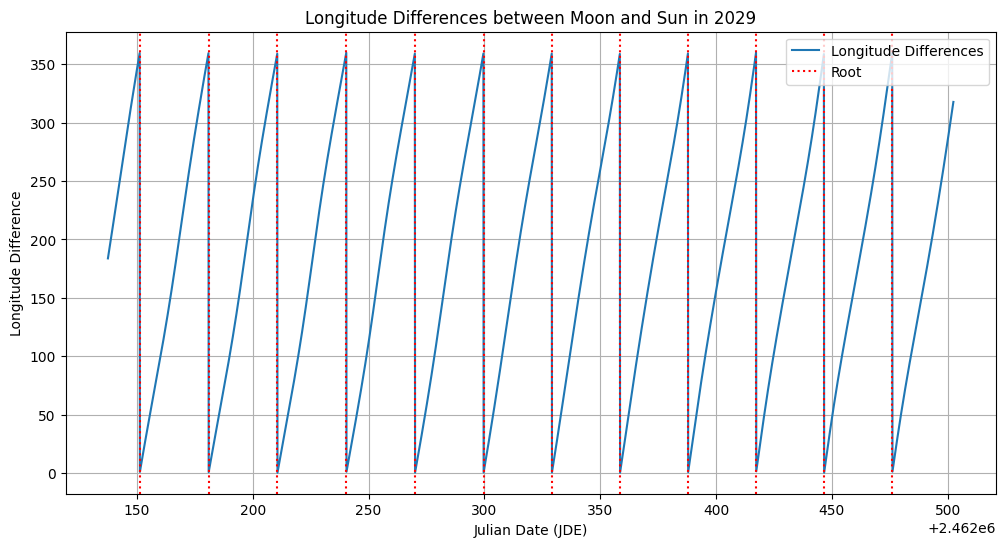

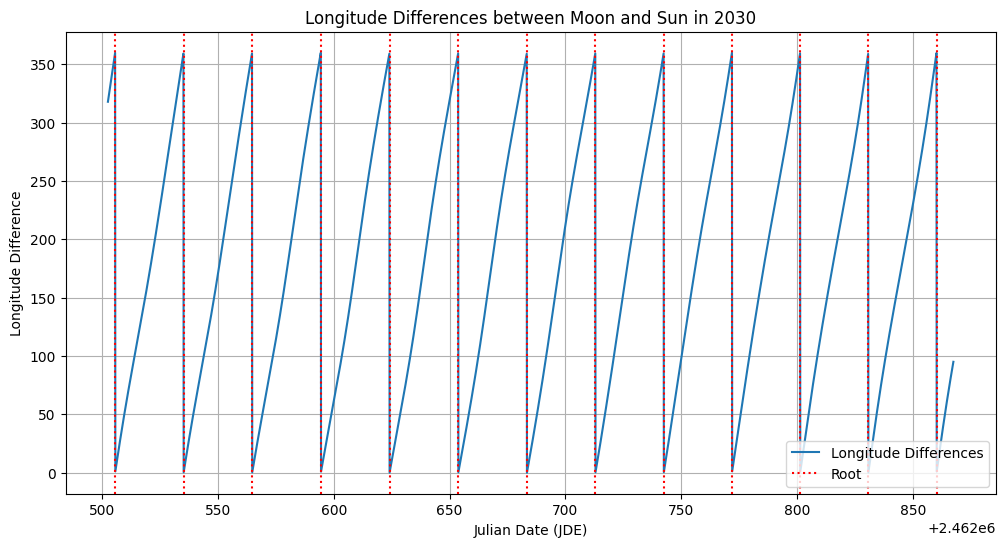

In [20]:
plot_year(2024)
plot_year(2025)
plot_year(2026)
plot_year(2027)
plot_year(2028)
plot_year(2029)
plot_year(2030)